In [ ]:
%pip install "scikit-learn==1.6.0" | tail -n 1
%pip install "pandas==2.2.0" | tail -n 1
%pip install "matplotlib==3.10.0" | tail -n 1

### Import and process California housing dataset

In [2]:
from sklearn import datasets

california_housing = datasets.fetch_california_housing(as_frame=True)
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [3]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
california_housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

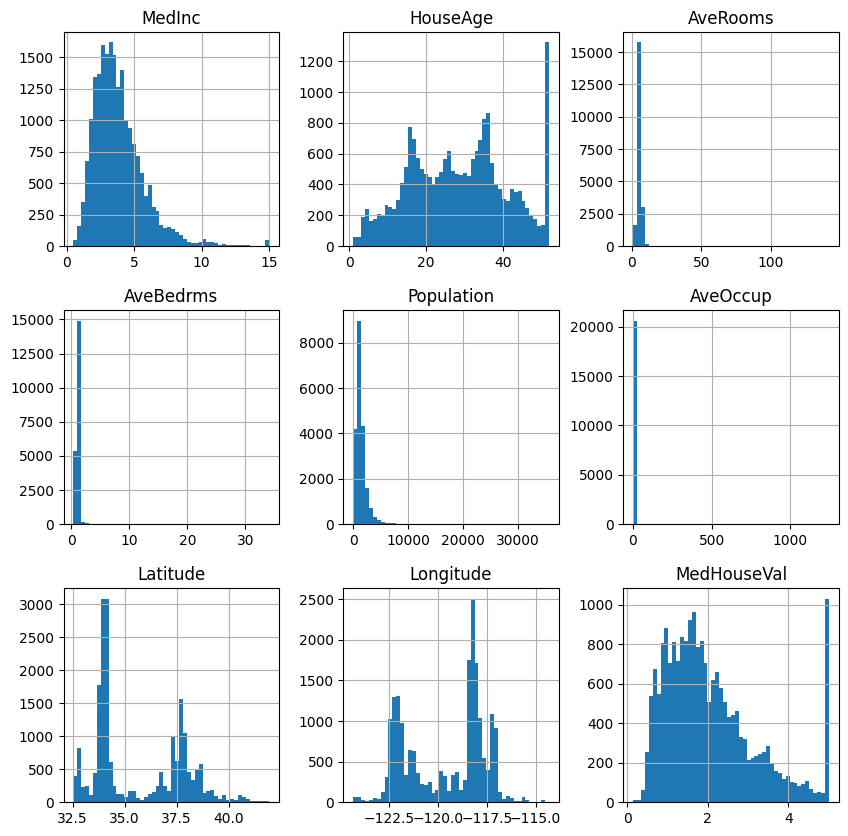

In [7]:
import matplotlib.pyplot as plt

california_housing.frame.hist(figsize=(10, 10), bins=50)
plt.show()

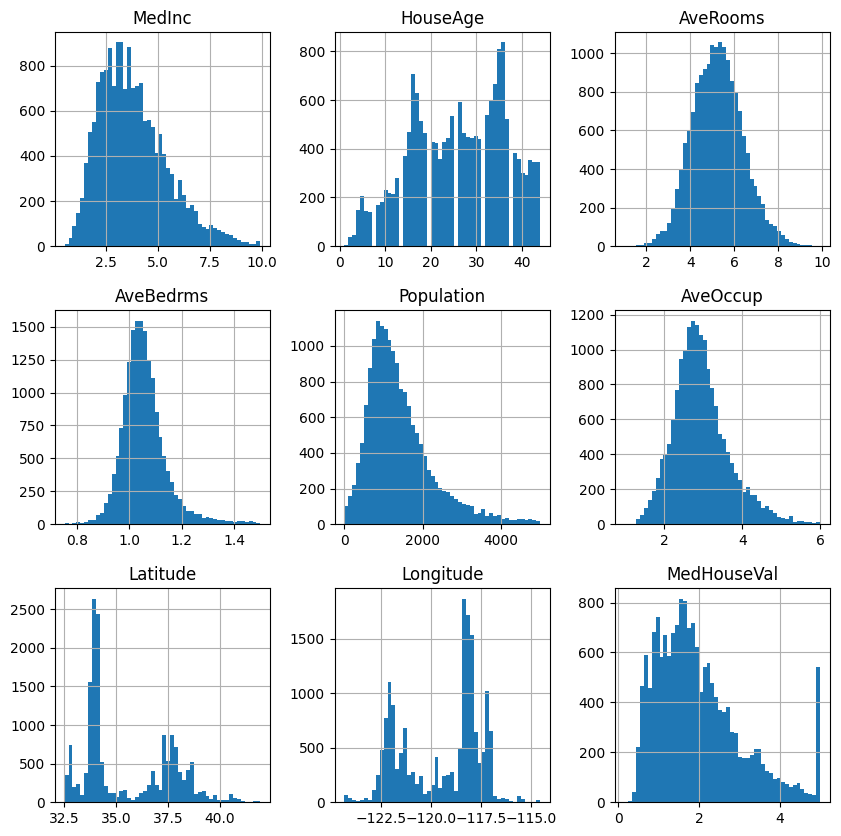

In [8]:
california_housing.frame = california_housing.frame[
    (california_housing.frame["MedInc"] < 10)
    & (california_housing.frame["HouseAge"] < 45)
    & (california_housing.frame["AveRooms"] < 10)
    & (california_housing.frame["AveBedrms"] > 0.75)
    & (california_housing.frame["AveBedrms"] < 1.5)
    & (california_housing.frame["Population"] < 5000)
    & (california_housing.frame["AveOccup"] < 6)
]

california_housing.frame.hist(figsize=(10, 10), bins=50)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(california_housing.data, california_housing.target)

### Train `LinearRegression` model

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

linear_regression_model_pipeline = make_pipeline(
    StandardScaler(),
    LinearRegression()
)
linear_regression_model_pipeline.fit(X_train, y_train)
linear_regression_model_pipeline.score(X_test, y_test)

0.6128970519340851

In [11]:
import os
import pickle
import tarfile

from sklearn.base import RegressorMixin

def export_model_to_file(model: RegressorMixin, pickle_path: str, archive_path: str):
    with open(pickle_path, "wb") as file:
        pickle.dump(model, file)

    with tarfile.open(archive_path, "w:gz") as file:
        file.add(pickle_path, os.path.basename("california_house_prices_model.pickle"))

    with open(pickle_path, "rb") as file:
        pickle_model: RegressorMixin = pickle.load(file)

    # Verify that the model was correctly exported
    assert pickle_model.score(X_test, y_test) == model.score(X_test, y_test)

export_model_to_file(
    linear_regression_model_pipeline,
    "../model/california_house_prices_model.pickle",
    "../model/california_house_prices_model.tar.gz"
)

### Train `RidgeCV` model

In [12]:
import numpy as np
from sklearn.linear_model import RidgeCV

ridge_cv_model_pipeline = make_pipeline(
    StandardScaler(),
    RidgeCV(np.linspace(0.1, 10, 1000), cv=10)
)
ridge_cv_model_pipeline.fit(X_train, y_train)
ridge_cv_model_pipeline.score(X_test, y_test)

0.6127753338027

In [13]:
export_model_to_file(
    ridge_cv_model_pipeline,
    "../model/updated_california_house_prices_model.pickle",
    "../model/updated_california_house_prices_model.tar.gz",
)